In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = '/content/WA_Fn-UseC_-HR-Employee-Attrition.csv'
hr_data = pd.read_csv(file_path)

In [3]:
# Select relevant columns for clustering
selected_columns = [
    "Department", "EducationField", "JobRole", "Education", "JobLevel",
    "TotalWorkingYears", "YearsInCurrentRole", "TrainingTimesLastYear"
]
clustering_data = hr_data[selected_columns]


In [4]:
# Encode categorical variables
categorical_columns = ["Department", "EducationField", "JobRole"]
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    clustering_data[col] = label_encoders[col].fit_transform(clustering_data[col])

<ipython-input-4-450f39b67e08>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data[col] = label_encoders[col].fit_transform(clustering_data[col])
<ipython-input-4-450f39b67e08>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data[col] = label_encoders[col].fit_transform(clustering_data[col])
<ipython-input-4-450f39b67e08>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [5]:
# Standardize numerical columns
numerical_columns = ["Education", "JobLevel", "TotalWorkingYears",
                     "YearsInCurrentRole", "TrainingTimesLastYear"]
scaler = StandardScaler()
clustering_data[numerical_columns] = scaler.fit_transform(clustering_data[numerical_columns])


<ipython-input-5-002798427b25>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data[numerical_columns] = scaler.fit_transform(clustering_data[numerical_columns])


In [6]:
# Perform K-Means Clustering
k = 3  # Optimal number of clusters (adjust based on Elbow Method)
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(clustering_data)
clustering_data['Cluster'] = kmeans.labels_


<ipython-input-6-6f0ec0ca1161>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['Cluster'] = kmeans.labels_


In [7]:
# Save clustered data
output_file = 'employee_clusters.csv'
clustering_data.to_csv(output_file, index=False)
print(f"Clustered data saved to {output_file}")

Clustered data saved to employee_clusters.csv


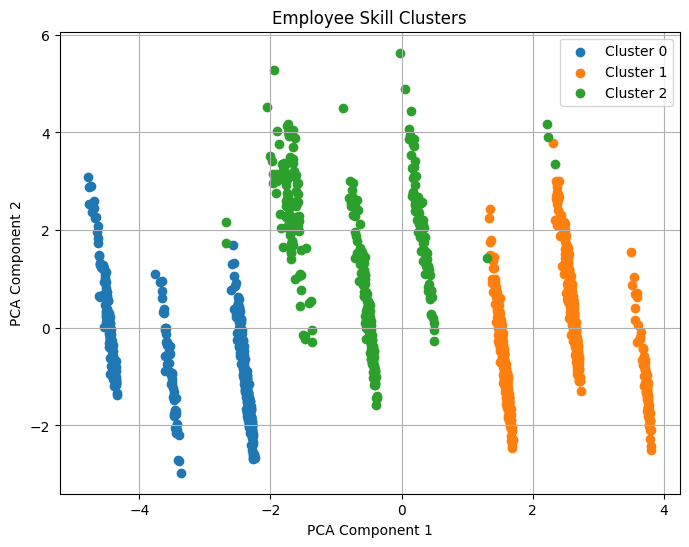

In [9]:
# Visualize the clusters (if feasible in 2D)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(clustering_data.drop('Cluster', axis=1))
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_points = reduced_data[clustering_data['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title("Employee Skill Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()

